## Muhammad Zubair
### Problem 2 walkthrough

##### Importing libraries

In [3]:
#libraries
import pandas as pd 
import numpy as np 
import matplotlib as mt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
import xgboost as xgb
from xgboost import XGBClassifier
import tensorflow as tf
import seaborn as sns

#### Reading Data files, displaying them 

In [4]:
treatements = pd.read_csv('treatments.csv')
users = pd.read_csv('users.csv')
weights = pd.read_csv('weights.csv')

In [5]:
users.head()

,UID,Name,LastName,Gender,Unit,Birthday,Age,Height,CreatedDate,IsActive,ClinicID,loginId,success
0,77f03b02-1a05-11ee-a492-eaf1cf2ff621,Jay,Hood,Male,0,1960-06-19 14:32:36,63,170,2023-03-08 18:54:42,True,5066,NaN,True
1,787d3af2-1a05-11ee-a492-eaf1cf2ff621,Austin,Carter,Male,1,1985-05-12 19:18:43,38,166,2023-05-13 18:54:42,True,5066,NaN,True
2,78bfc34a-1a05-11ee-a492-eaf1cf2ff621,Breanna,Frank,Female,1,1983-02-14 08:59:22,40,159,2023-03-21 18:54:42,True,5066,NaN,True
3,793dddde-1a05-11ee-a492-eaf1cf2ff621,Gwendolyn,Charles,Female,1,1980-04-20 04:57:38,43,159,2023-04-18 18:54:42,True,5066,NaN,True
4,799e3c06-1a05-11ee-a492-eaf1cf2ff621,Cheyenne,Davis,Female,0,1980-03-30 14:34:05,43,161,2023-03-15 18:54:42,True,5066,NaN,True


In [6]:
weights.head()

,MasterUserID,Weight,BMI,BodyFat,BodyWater,Bone,VisceralFat,BMR,MuscleMass,CreatedDate,UpdatedDate,IsActive,IsDelete
0,77f03b02-1a05-11ee-a492-eaf1cf2ff621,86.8,30.0,26.9,50.0,3.0,12.8,1709.4,57.2,2023-05-16 18:54:42,2023-05-16 18:54:42,True,False
1,77f03b02-1a05-11ee-a492-eaf1cf2ff621,87.9,30.4,27.1,48.4,3.0,12.9,1724.0,57.0,2023-04-23 18:54:42,2023-04-23 18:54:42,True,False
2,77f03b02-1a05-11ee-a492-eaf1cf2ff621,87.3,30.2,27.1,48.8,3.0,12.9,1716.2,57.0,2023-05-05 18:54:42,2023-05-05 18:54:42,True,False
3,77f03b02-1a05-11ee-a492-eaf1cf2ff621,84.1,29.1,25.5,51.0,2.6,12.7,1673.6,55.9,2023-06-30 18:54:42,2023-06-30 18:54:42,True,False
4,77f03b02-1a05-11ee-a492-eaf1cf2ff621,86.6,30.0,26.8,50.0,3.0,12.8,1706.4,57.2,2023-05-20 18:54:42,2023-05-20 18:54:42,True,False


In [7]:
treatements.head()

,MasterUserID,TreatmentTypeID,StartDate
0,77f03b02-1a05-11ee-a492-eaf1cf2ff621,1,2023-03-08 18:54:42
1,787d3af2-1a05-11ee-a492-eaf1cf2ff621,1,2023-05-13 18:54:42
2,78bfc34a-1a05-11ee-a492-eaf1cf2ff621,1,2023-03-21 18:54:42
3,793dddde-1a05-11ee-a492-eaf1cf2ff621,1,2023-04-18 18:54:42
4,799e3c06-1a05-11ee-a492-eaf1cf2ff621,1,2023-03-15 18:54:42


#### Joining the three files using MasterUserID

In [8]:
# renaming the column UID to MasterUserID
users = users.rename(columns={'UID':'MasterUserID'})

In [9]:
# Join statement
df = pd.merge(pd.merge(users,weights,on='MasterUserID'),treatements,on='MasterUserID')
df.head()

,MasterUserID,Name,LastName,Gender,Unit,Birthday,Age,Height,CreatedDate_x,IsActive_x,...,Bone,VisceralFat,BMR,MuscleMass,CreatedDate_y,UpdatedDate,IsActive_y,IsDelete,TreatmentTypeID,StartDate
0,77f03b02-1a05-11ee-a492-eaf1cf2ff621,Jay,Hood,Male,0,1960-06-19 14:32:36,63,170,2023-03-08 18:54:42,True,...,3.0,12.8,1709.4,57.2,2023-05-16 18:54:42,2023-05-16 18:54:42,True,False,1,2023-03-08 18:54:42
1,77f03b02-1a05-11ee-a492-eaf1cf2ff621,Jay,Hood,Male,0,1960-06-19 14:32:36,63,170,2023-03-08 18:54:42,True,...,3.0,12.9,1724.0,57.0,2023-04-23 18:54:42,2023-04-23 18:54:42,True,False,1,2023-03-08 18:54:42
2,77f03b02-1a05-11ee-a492-eaf1cf2ff621,Jay,Hood,Male,0,1960-06-19 14:32:36,63,170,2023-03-08 18:54:42,True,...,3.0,12.9,1716.2,57.0,2023-05-05 18:54:42,2023-05-05 18:54:42,True,False,1,2023-03-08 18:54:42
3,77f03b02-1a05-11ee-a492-eaf1cf2ff621,Jay,Hood,Male,0,1960-06-19 14:32:36,63,170,2023-03-08 18:54:42,True,...,2.6,12.7,1673.6,55.9,2023-06-30 18:54:42,2023-06-30 18:54:42,True,False,1,2023-03-08 18:54:42
4,77f03b02-1a05-11ee-a492-eaf1cf2ff621,Jay,Hood,Male,0,1960-06-19 14:32:36,63,170,2023-03-08 18:54:42,True,...,3.0,12.8,1706.4,57.2,2023-05-20 18:54:42,2023-05-20 18:54:42,True,False,1,2023-03-08 18:54:42


### Exploratory Data Aanalysis 
Understanding my data through visualization plots to determine feature engineering techniques I will utilize, the type of model I will build, and model evaluation metrics I will use on this dataset. 

<Axes: xlabel='success'>

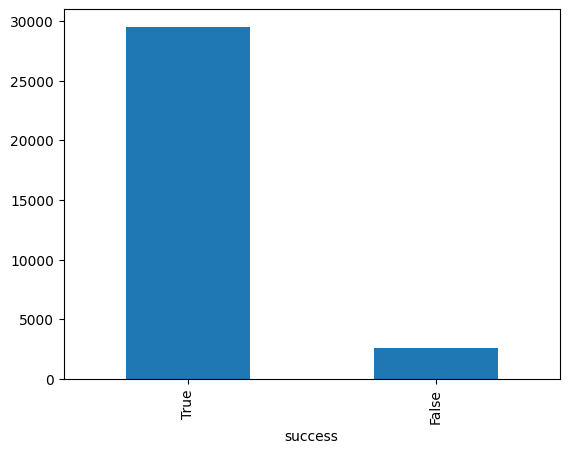

In [10]:
# Identifying if the response column is balanced
df['success'].value_counts().plot(kind='bar')

##### The sucesss (response) column is not balanced. This implies that we will have to use confusion matrix (Precision / Recall), ROC plot, and AUC score to evaluate our model. 

**Note:**    
**Using Accuracy will lead to incorrect evaluation of the model as this data does not have equal balanced classes, as seen from the plot above.**

<Axes: ylabel='Unit'>

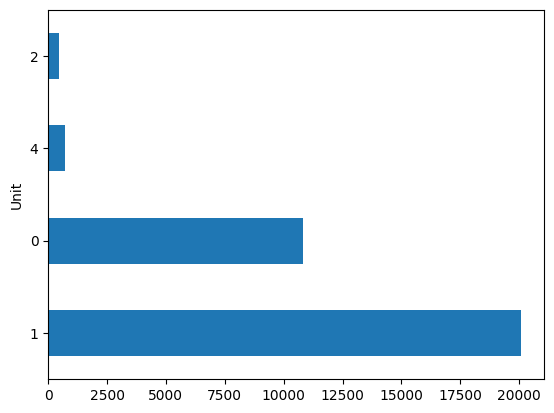

In [11]:
df['Unit'].value_counts().plot(kind='barh')

<Axes: >

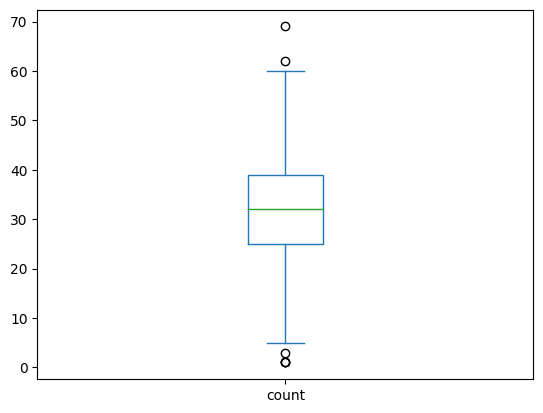

In [12]:
df['MasterUserID'].value_counts().plot(kind='box')

##### We can see that there are some outliers in data. Implying that some patients have more data than other patients (median is around 35)


**Note:**    
**There are only afew outliers in the data, hence we will not use any feature engineering techniques to deal with them in order to keep noise in the data.**

### Feature engineering and Data Cleaning

##### Looking at the data, I suspected that some date columns have the same value stored in them for all the users. 

**Let's make sure this is correct by visualizing these columns**

<Axes: ylabel='difference'>

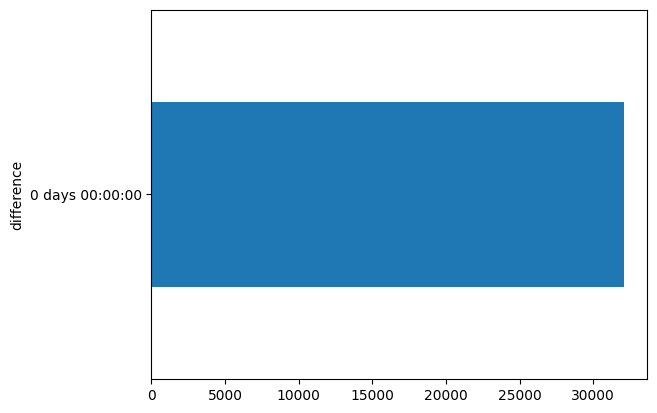

In [13]:
# Converting the date columns into datetime type
df['CreatedDate_x'] = pd.to_datetime(df['CreatedDate_x'])
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Finding the difference between each row in both columns to identify if they're same or not
df['difference'] = df['CreatedDate_x'] - df['StartDate']
df['difference'].value_counts().plot(kind='barh')

#####  Treatement StartDate and User CreateDate have the same values. Hence, we will only keep one of those columns in the data


##### Now looking at Create date and update date from the weights dataset

<Axes: ylabel='difference2'>

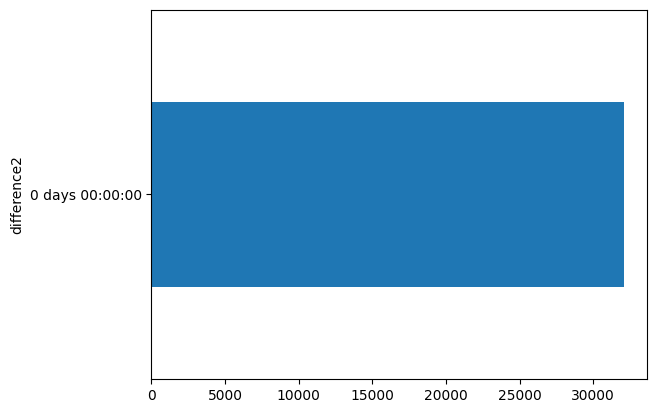

In [14]:
# Converting the date columns into datetime type
df['CreatedDate_y'] = pd.to_datetime(df['CreatedDate_y'])
df['UpdatedDate'] = pd.to_datetime(df['UpdatedDate'])

# Finding the difference between each row in both columns to identify if they're same or not
df['difference2'] = df['CreatedDate_y'] - df['UpdatedDate']
df['difference2'].value_counts().plot(kind='barh')

##### From the Weights data, CreateDate and UpdateDate have the same values for all the rows. Hence, we will only keep one of those columns

In [15]:
# dropping the date columns as per reason described above 
df = df.drop('CreatedDate_x', axis = 1) # UserCreate date is dropped (StartDate is kept)
df = df.drop('CreatedDate_y', axis = 1) # UserCreate date is dropped from weights data (UpdateDate is kept)

##### Extracting more information about columns in the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32073 entries, 0 to 32072
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   MasterUserID     32073 non-null  object         
 1   Name             32073 non-null  object         
 2   LastName         32073 non-null  object         
 3   Gender           32073 non-null  object         
 4   Unit             32073 non-null  int64          
 5   Birthday         32073 non-null  object         
 6   Age              32073 non-null  int64          
 7   Height           32073 non-null  int64          
 8   IsActive_x       32073 non-null  bool           
 9   ClinicID         32073 non-null  int64          
 10  loginId          0 non-null      float64        
 11  success          32073 non-null  bool           
 12  Weight           32073 non-null  float64        
 13  BMI              32073 non-null  float64        
 14  BodyFat          32073

##### Loginid column have all Nan value, hence it will be dropped as it adds no value to the data 

In [17]:
# removing the column 
df = df.drop('loginId', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32073 entries, 0 to 32072
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   MasterUserID     32073 non-null  object         
 1   Name             32073 non-null  object         
 2   LastName         32073 non-null  object         
 3   Gender           32073 non-null  object         
 4   Unit             32073 non-null  int64          
 5   Birthday         32073 non-null  object         
 6   Age              32073 non-null  int64          
 7   Height           32073 non-null  int64          
 8   IsActive_x       32073 non-null  bool           
 9   ClinicID         32073 non-null  int64          
 10  success          32073 non-null  bool           
 11  Weight           32073 non-null  float64        
 12  BMI              32073 non-null  float64        
 13  BodyFat          32073 non-null  float64        
 14  BodyWater        32073

##### Identifying if any column have the same unique value for all the rows 

In [18]:
nunique = df.nunique()

# Extracting column names that meets the condition stated above 
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['IsActive_x', 'ClinicID', 'IsActive_y', 'IsDelete', 'TreatmentTypeID',
       'difference', 'difference2'],
      dtype='object')

##### The above columns have only one unique value for all rows. They wont provide any extra information about how each point is different from another point in the data. Hence, they will be useless to incldue in the ML model 


In [19]:
# Dropping the above columns
df = df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32073 entries, 0 to 32072
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MasterUserID  32073 non-null  object        
 1   Name          32073 non-null  object        
 2   LastName      32073 non-null  object        
 3   Gender        32073 non-null  object        
 4   Unit          32073 non-null  int64         
 5   Birthday      32073 non-null  object        
 6   Age           32073 non-null  int64         
 7   Height        32073 non-null  int64         
 8   success       32073 non-null  bool          
 9   Weight        32073 non-null  float64       
 10  BMI           32073 non-null  float64       
 11  BodyFat       32073 non-null  float64       
 12  BodyWater     32073 non-null  float64       
 13  Bone          32073 non-null  float64       
 14  VisceralFat   32073 non-null  float64       
 15  BMR           32073 non-null  float6

##### We will also drop birthday column as we have age of patient already in dataset

**Note:** 
This will reduce any potential mulicolinearity issues in the model

In [20]:
# We will also drop birthday column as we have age of patient already in dataset
df = df.drop('Birthday', axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32073 entries, 0 to 32072
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MasterUserID  32073 non-null  object        
 1   Name          32073 non-null  object        
 2   LastName      32073 non-null  object        
 3   Gender        32073 non-null  object        
 4   Unit          32073 non-null  int64         
 5   Age           32073 non-null  int64         
 6   Height        32073 non-null  int64         
 7   success       32073 non-null  bool          
 8   Weight        32073 non-null  float64       
 9   BMI           32073 non-null  float64       
 10  BodyFat       32073 non-null  float64       
 11  BodyWater     32073 non-null  float64       
 12  Bone          32073 non-null  float64       
 13  VisceralFat   32073 non-null  float64       
 14  BMR           32073 non-null  float64       
 15  MuscleMass    32073 non-null  float6

##### Now, we will utilize more feature engineering techniques to increase the potential performace of Machine Learning model. 

**Sorting the data by UpdateDate in chronological order for each patient (Sort by Date, GroupBy UserID)**


In [22]:
# Sorting the data 
df = df.sort_values(['MasterUserID', 'UpdatedDate'])

##### Creating a new column to calculate TBWL of each person over time 

In [23]:
# Group by userId, and using the formula for TBWL found on internet to calculate the metric 
result = df.groupby('MasterUserID')['Weight'].apply(lambda x: ( ( (x.iloc[0] - x) / x.iloc[0] ) * 100  ))
df['TBWL'] = result.droplevel(0) 
df.head()

,MasterUserID,Name,LastName,Gender,Unit,Age,Height,success,Weight,BMI,BodyFat,BodyWater,Bone,VisceralFat,BMR,MuscleMass,UpdatedDate,StartDate,TBWL
10192,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,87.4,33.3,37.1,41.6,2.9,9.7,1502.0,47.4,2023-04-18 18:54:42,2023-04-16 18:54:42,0.000000
10189,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,84.9,32.4,36.4,41.7,3.0,9.3,1479.2,46.4,2023-04-26 18:54:42,2023-04-16 18:54:42,2.860412
10196,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,85.7,32.7,35.6,41.8,3.0,9.3,1486.9,46.3,2023-05-01 18:54:42,2023-04-16 18:54:42,1.945080
10199,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,84.6,32.2,34.6,41.9,3.0,9.3,1476.0,46.0,2023-05-05 18:54:42,2023-04-16 18:54:42,3.203661
10203,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,84.8,32.3,31.1,42.7,3.1,9.3,1478.2,45.5,2023-05-12 18:54:42,2023-04-16 18:54:42,2.974828


##### Creating a new day-difference column that calculates the amount of days spent by each patinet on treatement

In [24]:
# Calculating difference 
result = df.groupby('MasterUserID')['UpdatedDate'].apply(lambda x: (  (x - x.iloc[0])  ))
df['DayDiff'] = result.droplevel(0) 

# Converting the column to integer and removing the unnecesary string
df['DayDiff'] = df['DayDiff'].astype('string')
df['DayDiff'] = df['DayDiff'].str.split(" ").str[0]
df['DayDiff'] = df['DayDiff'].astype('int')
df.head()

,MasterUserID,Name,LastName,Gender,Unit,Age,Height,success,Weight,BMI,BodyFat,BodyWater,Bone,VisceralFat,BMR,MuscleMass,UpdatedDate,StartDate,TBWL,DayDiff
10192,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,87.4,33.3,37.1,41.6,2.9,9.7,1502.0,47.4,2023-04-18 18:54:42,2023-04-16 18:54:42,0.000000,0
10189,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,84.9,32.4,36.4,41.7,3.0,9.3,1479.2,46.4,2023-04-26 18:54:42,2023-04-16 18:54:42,2.860412,8
10196,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,85.7,32.7,35.6,41.8,3.0,9.3,1486.9,46.3,2023-05-01 18:54:42,2023-04-16 18:54:42,1.945080,13
10199,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,84.6,32.2,34.6,41.9,3.0,9.3,1476.0,46.0,2023-05-05 18:54:42,2023-04-16 18:54:42,3.203661,17
10203,004af604-1a06-11ee-a492-eaf1cf2ff621,Cindy,Hartman,Female,1,59,162,True,84.8,32.3,31.1,42.7,3.1,9.3,1478.2,45.5,2023-05-12 18:54:42,2023-04-16 18:54:42,2.974828,24


##### Now that we calculated day difference between each record, we can drop the UpdatedDate column. We will also drop the StartDate column because the updatedate column is ALWAYS 2 days after StartDate for each patient. (As seen from visualizing the data) 

In [25]:
# dropping the date columns as per reason described above 
df = df.drop('UpdatedDate', axis = 1)
df = df.drop('StartDate', axis = 1) 

##### Name columns and MasterUserID will also be dropped because we have already sorted the data to store each patients information in chronological order. 

**NOTE:**

**Keeping these columns in the data will lead to us creating dummy variables for each patient during model building phase. 
(This will increase the dimensionality of our data, which will impact the score of the model)**

In [26]:
df = df.drop('Name', axis = 1)
df = df.drop('LastName', axis = 1) 
df = df.drop('MasterUserID', axis=1)
df.head()

,Gender,Unit,Age,Height,success,Weight,BMI,BodyFat,BodyWater,Bone,VisceralFat,BMR,MuscleMass,TBWL,DayDiff
10192,Female,1,59,162,True,87.4,33.3,37.1,41.6,2.9,9.7,1502.0,47.4,0.000000,0
10189,Female,1,59,162,True,84.9,32.4,36.4,41.7,3.0,9.3,1479.2,46.4,2.860412,8
10196,Female,1,59,162,True,85.7,32.7,35.6,41.8,3.0,9.3,1486.9,46.3,1.945080,13
10199,Female,1,59,162,True,84.6,32.2,34.6,41.9,3.0,9.3,1476.0,46.0,3.203661,17
10203,Female,1,59,162,True,84.8,32.3,31.1,42.7,3.1,9.3,1478.2,45.5,2.974828,24


##### We will now perfrom label encoding convert the gender and success column into 0 and 1 labels  

In [27]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['success'] = df['success'].apply(lambda x: 1 if x == True else 0)
df['Gender'] = df['Gender'].astype('int')

### Final Phase of Exploratory Data Analysis to identify how our data looks before going to the model building phase 

<Axes: >

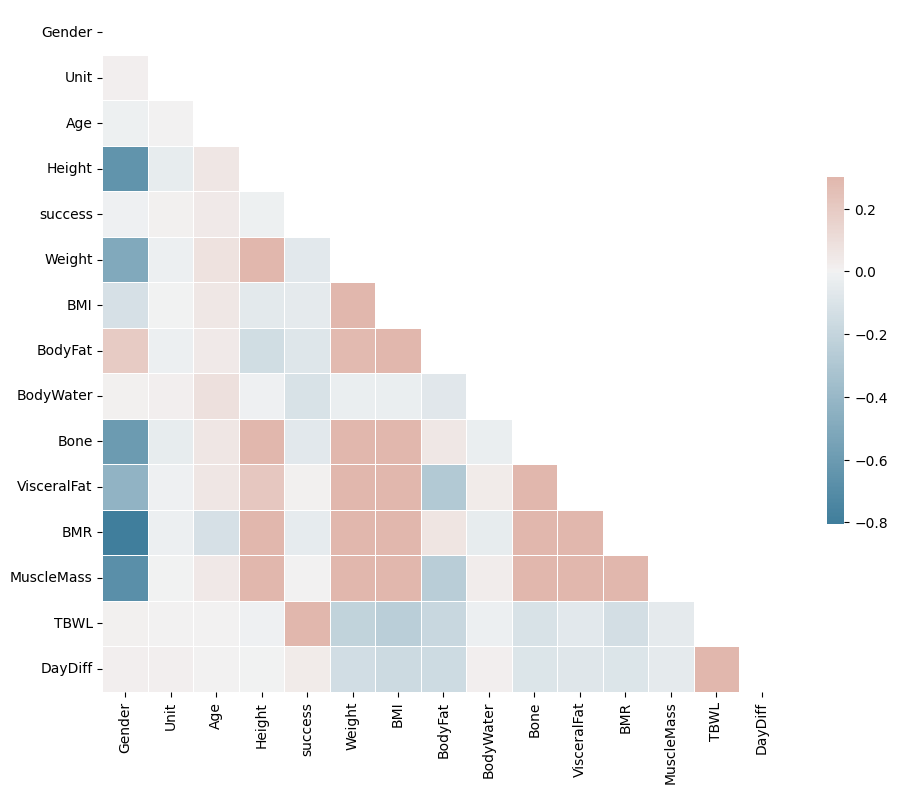

In [28]:
# Correlation matrix 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap= sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap = cmap, vmax=.3,
 center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

##### We can see that there aren't any impactful multicolinearity instances. Hence, we will use all these predictors in the model building phase to keep noise in the data

##### Creating a time series plot to identify any unsual trends in the data between the two classes  

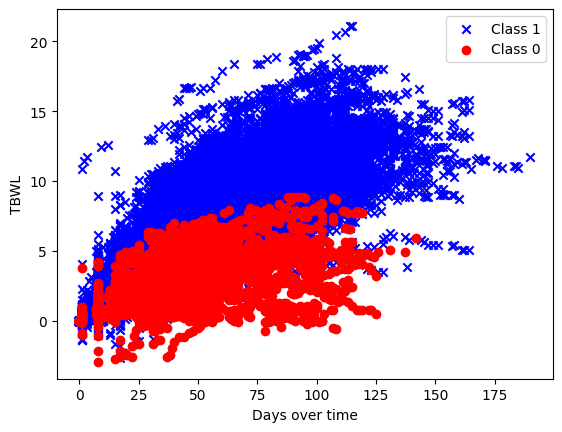

In [29]:
# Extracting all the rows for each class type
df1 = df.query('success == 1')
df0 = df.query('success == 0')

# Plot 
plt.scatter( df1['DayDiff']  , df1['TBWL'], color='blue', marker='x', label='Class 1')
plt.scatter(df0['DayDiff']  , df0['TBWL'], color='red', marker='o', label='Class 0') 
plt.xlabel('Days over time') 
plt.ylabel('TBWL')
plt.legend() 
plt.show()    

##### From the plot above, we can see that you can't really determine if a patient is ON TRACK until after a certain amount of days. 

**Based on the plot, We will imply these techniques to increase performace of the model:**

1. We will use all the rows and days over time to train our data. This will let our model capture complexity

2. When we test our model, we will only make prediction if a patient have completed treatement for atleast 30 days. This is because the plot shows us that before 30 days, the two classes overlap alot. Implying that it can be very difficult to predict if a patient will be on track or not. 

### Splitting the Data into train and test 
- Around 90% is splitted towards train and the 10% is towards test 
 - I also made sure to keep all the data of each patient in one group. For example, patients in test data will not be found in train data 

In [30]:
# Splitting the data
train = df[:28014]
test = df[28014:]

# Subseting to extract each patients record after 30 days
test = test [ (test['DayDiff'] >= 30) ]

In [50]:
test.head()

,Gender,Unit,Age,Height,Weight,BMI,BodyFat,BodyWater,Bone,VisceralFat,BMR,MuscleMass,TBWL,DayDiff
8117,0.0,0.0,51.0,191.0,89.2,24.5,23.1,50.1,3.4,11.8,1910.8,61.9,6.203996,30.0
8113,0.0,0.0,51.0,191.0,89.0,24.4,23.1,50.2,3.4,11.0,1908.3,61.9,6.414301,31.0
8126,0.0,0.0,51.0,191.0,88.2,24.2,22.9,50.3,3.3,10.9,1896.7,61.8,7.255521,36.0
8123,0.0,0.0,51.0,191.0,88.0,24.1,22.9,50.4,3.3,10.9,1894.1,61.7,7.465825,37.0
8125,0.0,0.0,51.0,191.0,87.8,24.1,22.9,50.4,3.3,10.9,1892.0,60.7,7.676130,38.0


##### Now, let's make sure we extracted around same percentage of classes in both train and test datasets 

<Axes: xlabel='Gender'>

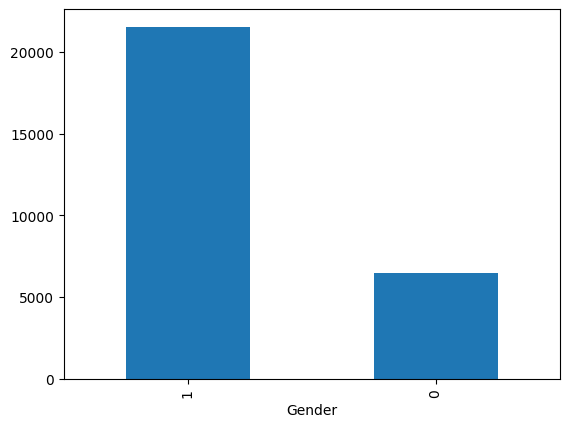

In [31]:
# Identifying percentages of men and female in train and test 
train['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

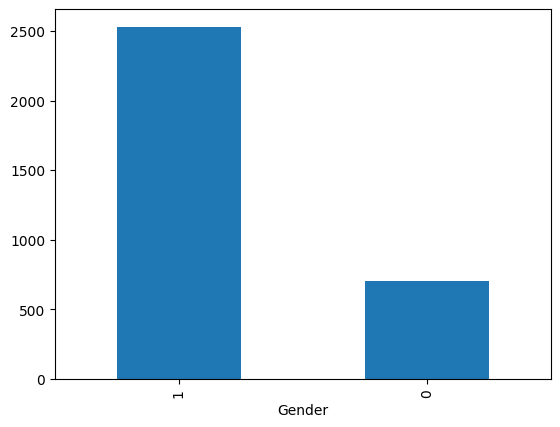

In [32]:
test['Gender'].value_counts().plot(kind='bar')

##### We can see the distribution of barplots look around the same. Hence, same percentage of gender is extracted in both train and test groups

<Axes: xlabel='success'>

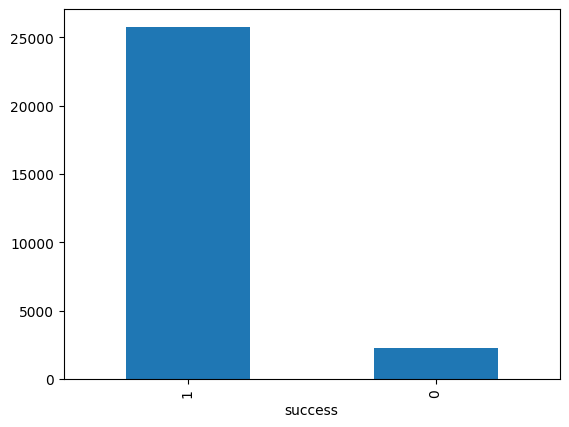

In [33]:
# Identifying percentages of sucsess in TBWL in train and test 
train['success'].value_counts().plot(kind='bar')

<Axes: xlabel='success'>

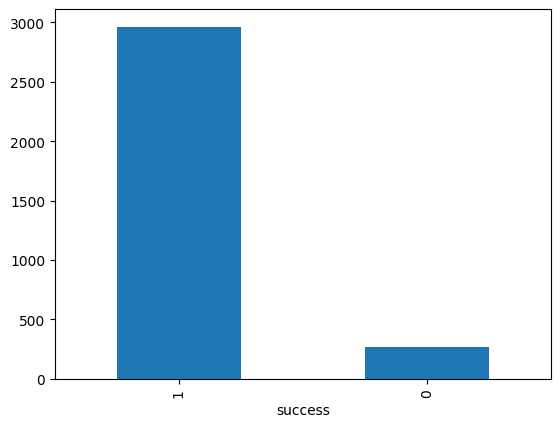

In [34]:
test['success'].value_counts().plot(kind='bar')

##### We can see the distribution of barplots look around the same. Hence, same percentage of success is extracted in both train and test groups

In [35]:
# Removing the response column (Success) from training and testing groups, and storing it into a sepreate dataframe 
train_y = train['success']
train = train.drop('success', axis=1)
test_y = test['success']
test = test.drop('success', axis=1)

### Model Building

- I decided to use Ensemble learning model on this data due to its complex and imbalanced nature. I went with XGBoost since it uses trees to build on data to learn from past mistakes (residuals) and then use those residuals to build the next tree (this process is repeated until residuals stops reducing). This technique will be useful on this dataset because at first the model will predict most of the patients to be on track due to imbalance nature of success column. Afterwards it will use hyperparmeters given by me to iteratively fix those mistakes.

**Note:**

I have also tried out Random Forest, and ANN's on this data using different hyperparameters. However, XGBoost provided the best results. 

In [36]:
# Create adaboost classifer object
xgb = XGBClassifier()

# Train Adaboost Classifer
model = xgb.fit(train, train_y)

#Predict the response on test dataset (Increasing the threshold to increase performance on undersampled class (0))
y_pred = (xgb.predict_proba(test)[:,1] > 0.97)

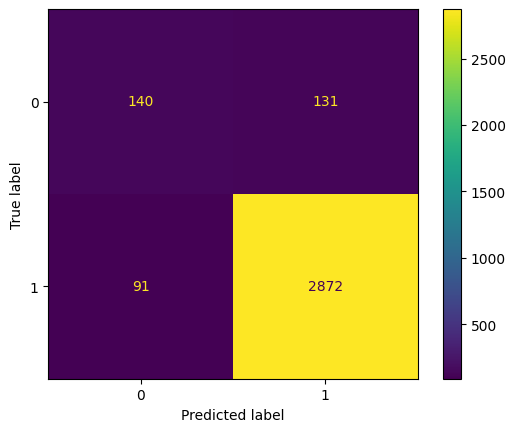

In [37]:
cm = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### From the confusion matrix, we can see that model performs well on over samapled class (1). However, ....
- Due to the imbalance nature of data, the model has a hard time of making accurate predictions for the under sampled class (0). 
- We can see that it misclassified almost half of patients that are not on track as 'on track'. We have to reduce this number since we would like to closely pay attention to patients who are not on track and determine how to change that at an early stage. 

In [38]:
print(classification_report(test_y, y_pred))

# Function to print out the ROC plot
import matplotlib.pyplot as plt
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    

              precision    recall  f1-score   support

           0       0.61      0.52      0.56       271
           1       0.96      0.97      0.96      2963

    accuracy                           0.93      3234
   macro avg       0.78      0.74      0.76      3234
weighted avg       0.93      0.93      0.93      3234



AUC score: 0.74


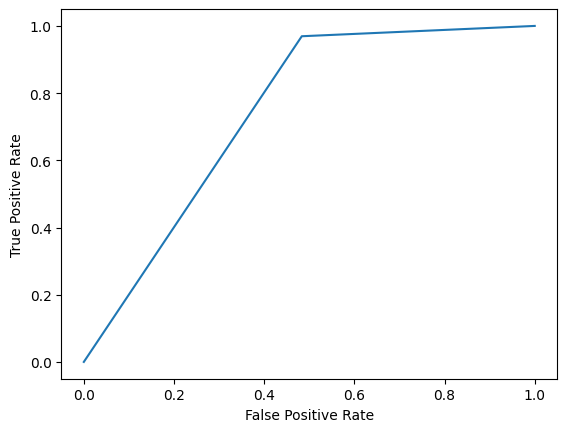

In [846]:
plot_roc_curve(test_y, y_pred)
print(f'AUC score: { round(roc_auc_score(test_y, y_pred), 2)}')

##### From the AUC value of 0.74, and recall value of 0.52 for under-sampled class (0). We can conclude that our model performed poorly in predicting patients who are not on track 

##### Using GridSearchCv to tune parameters of XGboost model and impact its learning rate on the training data to capture complex relationships and increase model performance

In [847]:
# Making the grid to fit model on ALL combinations of parameters below, and output optimal parameters
parameters = {
    'max_depth': [4,6,8],
    'colsample_bytree': [0.3, 0.7, 1],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma' : [0.2,0.5, 1],
    'reg_alpha': [0.2, 0.6, 1]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)
grid_search.fit(train, train_y)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'colsample_bytree': [0.3, 0.7, 1],
                         'gamma': [0.2, 0.5, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [4, 6, 8], 'reg_alpha': [0.2, 0.6, 1]},
             scoring='roc_auc', verbose=True)

In [848]:
# These are the optimal parametes of the model on this data
grid_search.best_params_

{'colsample_bytree': 1,
 'gamma': 0.5,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_alpha': 0.6}

In [51]:
# Creating Xgboost classifer object with hyperparameters from the above results
finalmodel = XGBClassifier(learning_rate=0.085, n_estimators = 5000, max_depth = 4, gamma = 0.5, colsample_bytree = 1,  
                  reg_alpha = 0.5)
# Training the model
model = finalmodel.fit(train, train_y)

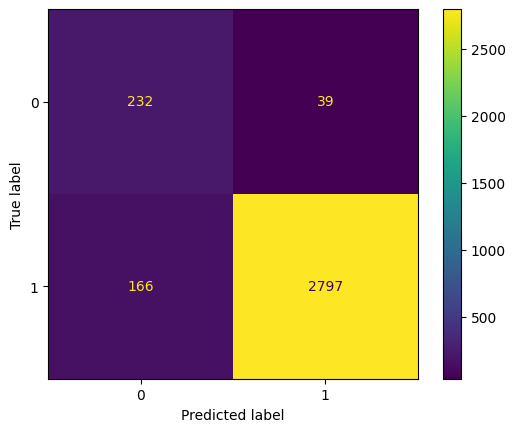

In [52]:
y_pred = (finalmodel.predict_proba(test)[:,1] > 0.982)
cfm_test = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cfm_test).plot();

##### After hyperparameter tuning, we can see that model performs relatively well on under samapled class with a trade off of missclassifying some observations (166) of over-sampled class(1) to under-sampled class (0). Nonetheless, this is a very good model as compared to the evaluation of other models used on this excercise

In [53]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.86      0.69       271
           1       0.99      0.94      0.96      2963

    accuracy                           0.94      3234
   macro avg       0.78      0.90      0.83      3234
weighted avg       0.95      0.94      0.94      3234



AUC score: 0.9


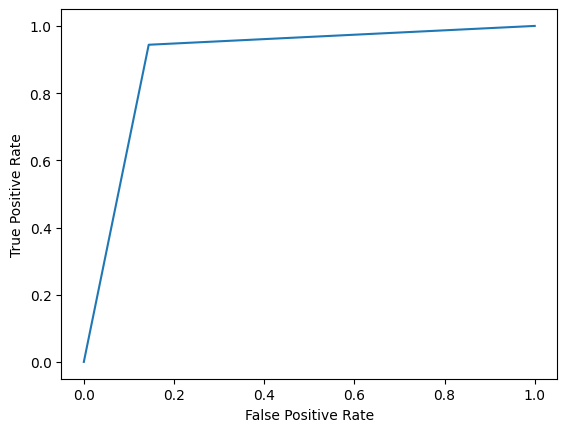

In [54]:
plot_roc_curve(test_y, y_pred)
print(f'AUC score: { round(roc_auc_score(test_y, y_pred), 2)}')

##### We have bumped the AUC value from 0.74 to 0.90 (Implying that our model makes a correct classification between the two classes 90% of the time). We can conclude that this model performed the best in predicting patients success in the program. 

**Note:**
- With more training data in future, the model AUC will continue to increase on test data.

### Saving the model to deploy it on a website where Allurion patients can enter their personalized data from app to identify if they're on track or not 

In [43]:
import pickle
data = {"model": model}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [44]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data["model"]

#### Link to web application: https://allurion-work-simulation.streamlit.app/

### Below are some other models I built (Did not perform as good as XGBoost)

In [836]:
rf = RandomForestClassifier(n_estimators=200, max_depth=1000)
rf.fit(train, train_y)

RandomForestClassifier(max_depth=1000, n_estimators=200)

In [837]:
rf_pred = (rf.predict_proba(test)[:,1] > 0.95)

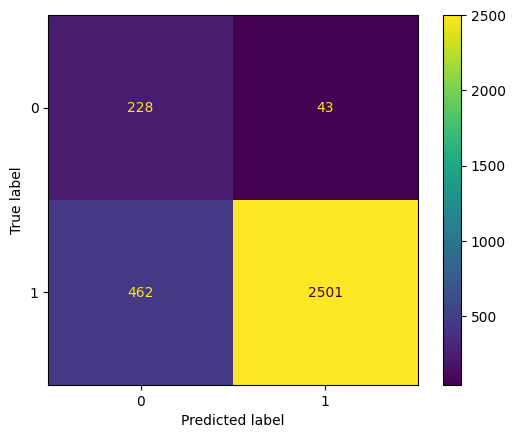

In [838]:
cm = confusion_matrix(test_y, rf_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [839]:
precision = precision_score(test_y, rf_pred)
recall = recall_score(test_y, rf_pred)
f = f1_score(test_y,rf_pred)
Auc = roc_auc_score(test_y,rf_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F-Score:", f)
print("Auc:", Auc)

Recall: 0.844076949038137
Precision: 0.9830974842767296
F-Score: 0.908298529144725
Auc: 0.8427026811611349


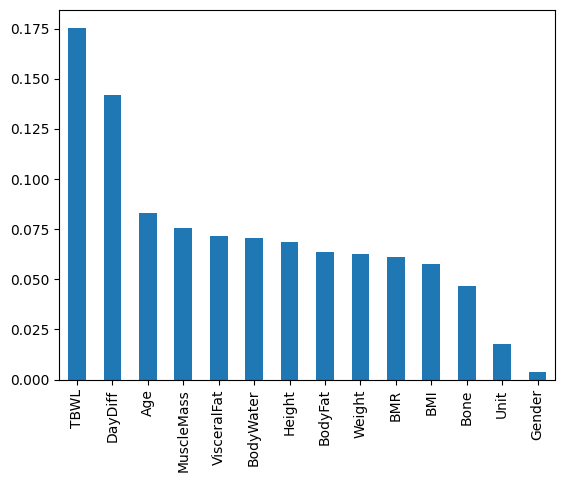

In [291]:
feature_importances = pd.Series(rf.feature_importances_, index=train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

##### We can see that the features we created in the feature engineering phase are most important predictors 

##### Neural network

In [748]:
# Scaling is a good technique to use on deep learning models
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)

In [749]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, input_dim=train.shape[1],activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, input_dim=train.shape[1],activation="relu"))
ann.add(tf.keras.layers.Dense(units=10, input_dim=train.shape[1],activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [750]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#history = ann.fit(train, train_y, verbose=0, epochs=100)
ann.fit(train,train_y,batch_size=32,epochs = 20, verbose=1)

Epoch 1/20
876/876 [==============================] - 1s 416us/step - loss: 0.2464 - accuracy: 0.9221
Epoch 2/20
876/876 [==============================] - 0s 423us/step - loss: 0.1652 - accuracy: 0.9388
Epoch 3/20
876/876 [==============================] - 0s 383us/step - loss: 0.1540 - accuracy: 0.9444
Epoch 4/20
876/876 [==============================] - 0s 381us/step - loss: 0.1485 - accuracy: 0.9467
Epoch 5/20
876/876 [==============================] - 0s 380us/step - loss: 0.1442 - accuracy: 0.9477
Epoch 6/20
876/876 [==============================] - 0s 380us/step - loss: 0.1408 - accuracy: 0.9488
Epoch 7/20
876/876 [==============================] - 0s 380us/step - loss: 0.1375 - accuracy: 0.9497
Epoch 8/20
876/876 [==============================] - 0s 384us/step - loss: 0.1347 - accuracy: 0.9507
Epoch 9/20
876/876 [==============================] - 0s 379us/step - loss: 0.1335 - accuracy: 0.9511
Epoch 10/20
876/876 [==============================] - 0s 380us/step - loss: 0.131

99/99 [==============================] - 0s 528us/step


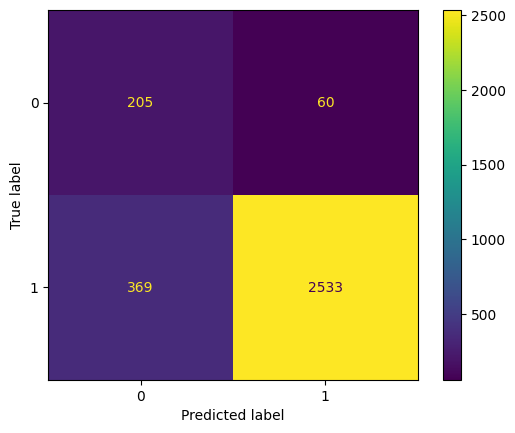

In [754]:
ann_pred = (ann.predict(test) > 0.95)
cfm_test = confusion_matrix(test_y, ann_pred)
ConfusionMatrixDisplay(confusion_matrix=cfm_test).plot();

In [240]:
precision = precision_score(test_y, ann_pred)
recall = recall_score(test_y, ann_pred)
f = f1_score(test_y,ann_pred)
Auc = roc_auc_score(test_y,ann_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F-Score:", f)
print("Auc:", Auc)

Recall: 0.832216563923881
Precision: 0.9706158174429509
F-Score: 0.8961038961038962
Auc: 0.7728155990351112


##### I have tried to increase the number of layers and epochs, but that only gives an outstanding performace on training data and does not perform well on test data

### The End of the notebook

#### Thank you for reviewing my work, please see the other 2 .py notebooks to see how I deployed my ML model into a web application 